## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials. 
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).


Payam Taebi
400104867


# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5. 

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [1]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):
    # Generate X values in the specified range
    X = np.linspace(range_start, range_end, num_samples)
    
    # Calculate y values based on the given equation with added noise
    y = 0.1 * X**5 + X**4 - 2 * X**3 + 7 * X**2 - 9 * X + 3 + np.random.normal(0, noise_std, num_samples)
    
    return X, y

# Generate the dataset
X, y = generate_dataset(-4, -1, 1000)


In [2]:
X, y = generate_dataset(-4, -1, 1000)

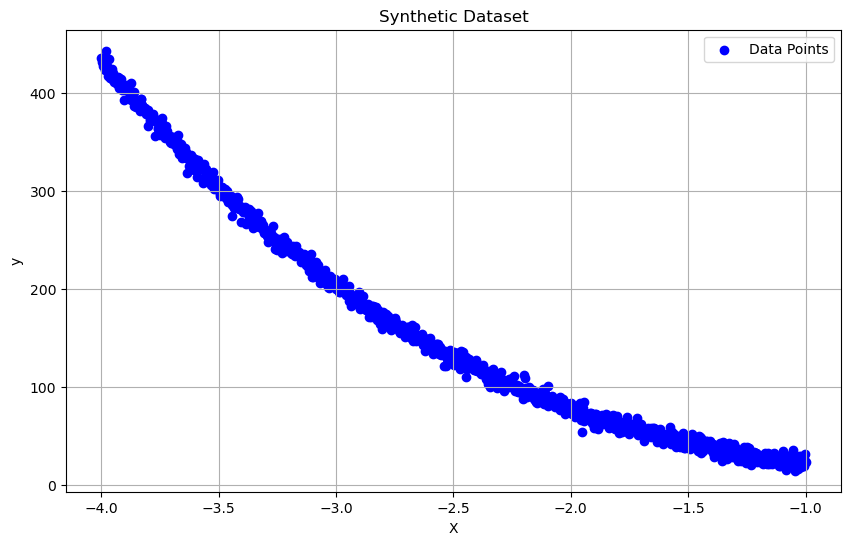

In [3]:
import matplotlib.pyplot as plt

# Plot the data
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.title('Synthetic Dataset')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test1, y_train, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

X_test2, y_test2 = generate_dataset(5, 7, len(X_test1))

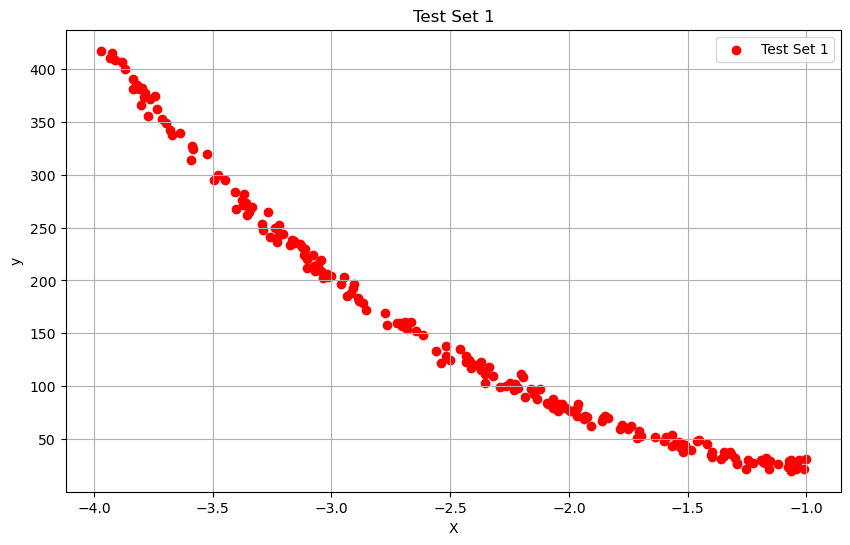

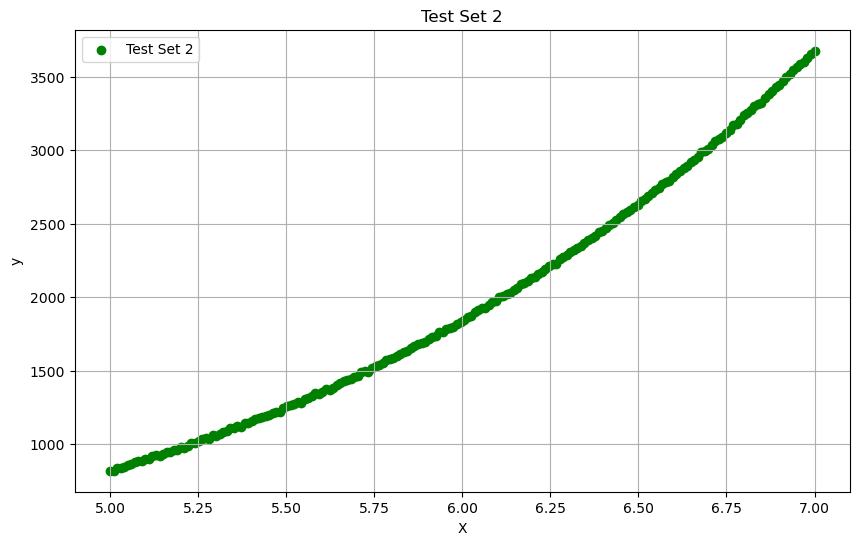

Test Set 1:
Number of samples: 200
Range of X values: -3.96996996996997 - -1.0030030030030028
Range of y values: 20.06999105917875 - 417.12834902223176

Test Set 2:
Number of samples: 200
Range of X values: 5.0 - 7.0
Range of y values: 817.9683876618477 - 3677.4581488770573


In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(X_test1, y_test1, color='red', label='Test Set 1')
plt.title('Test Set 1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_test2, y_test2, color='green', label='Test Set 2')
plt.title('Test Set 2')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Print information about the datasets
print("Test Set 1:")
print("Number of samples:", len(X_test1))
print("Range of X values:", min(X_test1), "-", max(X_test1))
print("Range of y values:", min(y_test1), "-", max(y_test1))
print()
print("Test Set 2:")
print("Number of samples:", len(X_test2))
print("Range of X values:", min(X_test2), "-", max(X_test2))
print("Range of y values:", min(y_test2), "-", max(y_test2))


## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

def train_polynomial_regression(X, y, degree):    
    polynomial_features = PolynomialFeatures(degree=degree)
    
    linear_regression = LinearRegression()
    
    model = Pipeline([
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression)
    ])

    model.fit(X.reshape(-1, 1), y)
    
    return model


In [7]:
models = {}
degree = 5
for d in range(2, degree + 3):
    models[d] = train_polynomial_regression(X_train, y_train, d)

In [8]:
# Print model information
for degree, model in models.items():
    print("Polynomial Regression Model (Degree {}):".format(degree))
    print("Coefficients:", model.named_steps['linear_regression'].coef_)
    print("Intercept:", model.named_steps['linear_regression'].intercept_)
    print()

Polynomial Regression Model (Degree 2):
Coefficients: [ 0.         86.90411146 43.80768354]
Intercept: 73.04339064067295

Polynomial Regression Model (Degree 3):
Coefficients: [  0.         -12.16312666   1.21579361  -5.66478472]
Intercept: 3.1025582780936247

Polynomial Regression Model (Degree 4):
Coefficients: [  0.         -10.01547667   2.65808229  -5.26006936   0.04040241]
Intercept: 4.220371768604338

Polynomial Regression Model (Degree 5):
Coefficients: [ 0.         37.28535247 45.97950431 13.57852952  3.95103005  0.31171297]
Intercept: 23.753652967960335

Polynomial Regression Model (Degree 6):
Coefficients: [   0.         -108.01646701 -123.26314987  -87.09587745  -28.40697891
   -5.03485643   -0.35603461]
Intercept: -25.904464751494373

Polynomial Regression Model (Degree 7):
Coefficients: [0.00000000e+00 1.87497164e+03 2.67973716e+03 2.03325390e+03
 9.00474795e+02 2.31179390e+02 3.20111728e+01 1.84811582e+00]
Intercept: 552.4667425851115



## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [9]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses


In [10]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test1, y_test1)
losses_out_of_range = evaluate_models(models, X_test2, y_test2)

In [11]:

# Print mean squared errors for training set
print("Mean Squared Errors on training set:")
for degree, mse in losses_train.items():
    print(f"Degree {degree}: {mse}")

# Print mean squared errors for in-range test set
print("\nMean Squared Errors on in-range test set:")
for degree, mse in losses_in_range.items():
    print(f"Degree {degree}: {mse}")

# Print mean squared errors for out-of-range test set
print("\nMean Squared Errors on out-of-range test set:")
for degree, mse in losses_out_of_range.items():
    print(f"Degree {degree}: {mse}")


Mean Squared Errors on training set:
Degree 2: 31.78116788120575
Degree 3: 23.41791126895679
Degree 4: 23.41766002556358
Degree 5: 23.409339831397148
Degree 6: 23.40323099341624
Degree 7: 23.309163223716833

Mean Squared Errors on in-range test set:
Degree 2: 37.736536570809946
Degree 3: 28.407755876608427
Degree 4: 28.39145078384948
Degree 5: 28.306377503591296
Degree 6: 28.363528563138015
Degree 7: 28.2326904384095

Mean Squared Errors on out-of-range test set:
Degree 2: 267945.76689368725
Degree 3: 12040812.9606598
Degree 4: 10572163.548736056
Degree 5: 134539758.28963524
Degree 6: 18887105957.500343
Degree 7: 45154178514794.42


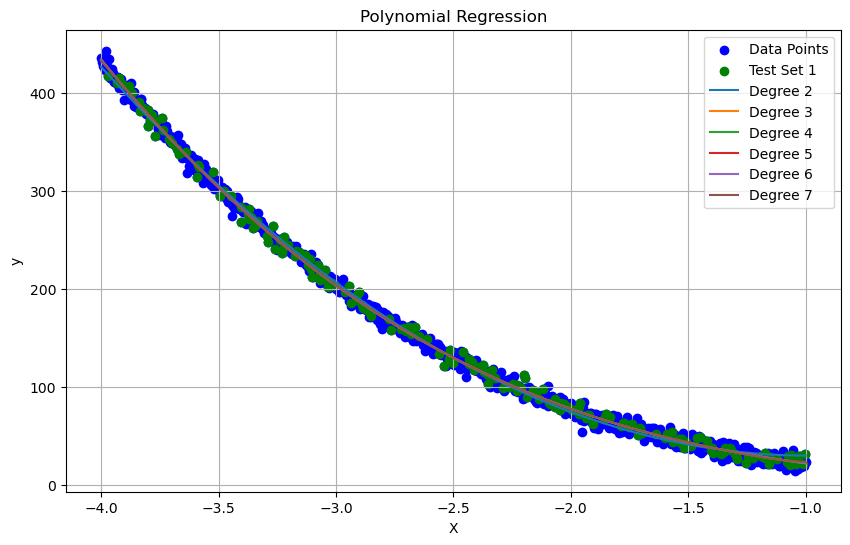

In [12]:

X_range = np.linspace(-4, -1, 1000)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the test data
plt.scatter(X_test1, y_test1, color='green', label='Test Set 1')

for degree, model in models.items():
    y_pred = model.predict(X_range.reshape(-1, 1))
    plt.plot(X_range, y_pred, label='Degree {}'.format(degree)) 
    
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


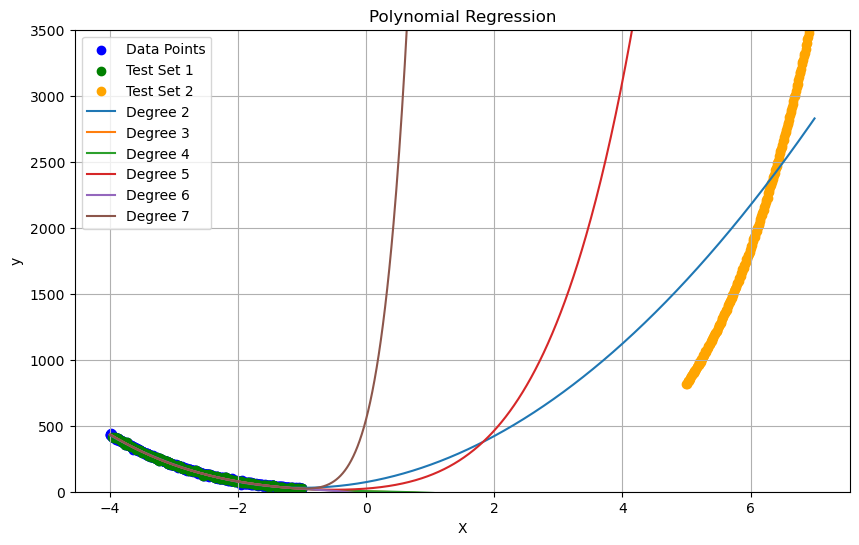

In [13]:

X_range = np.linspace(-4, 7, 1000)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data Points')

# Plot the test data
plt.scatter(X_test1, y_test1, color='green', label='Test Set 1')
plt.scatter(X_test2, y_test2, color='orange', label='Test Set 2')


for degree, model in models.items():
    y_pred = model.predict(X_range.reshape(-1, 1))
    plt.plot(X_range, y_pred, label='Degree {}'.format(degree))
    plt.ylim(0, 3500)  
    
plt.title('Polynomial Regression')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change. 


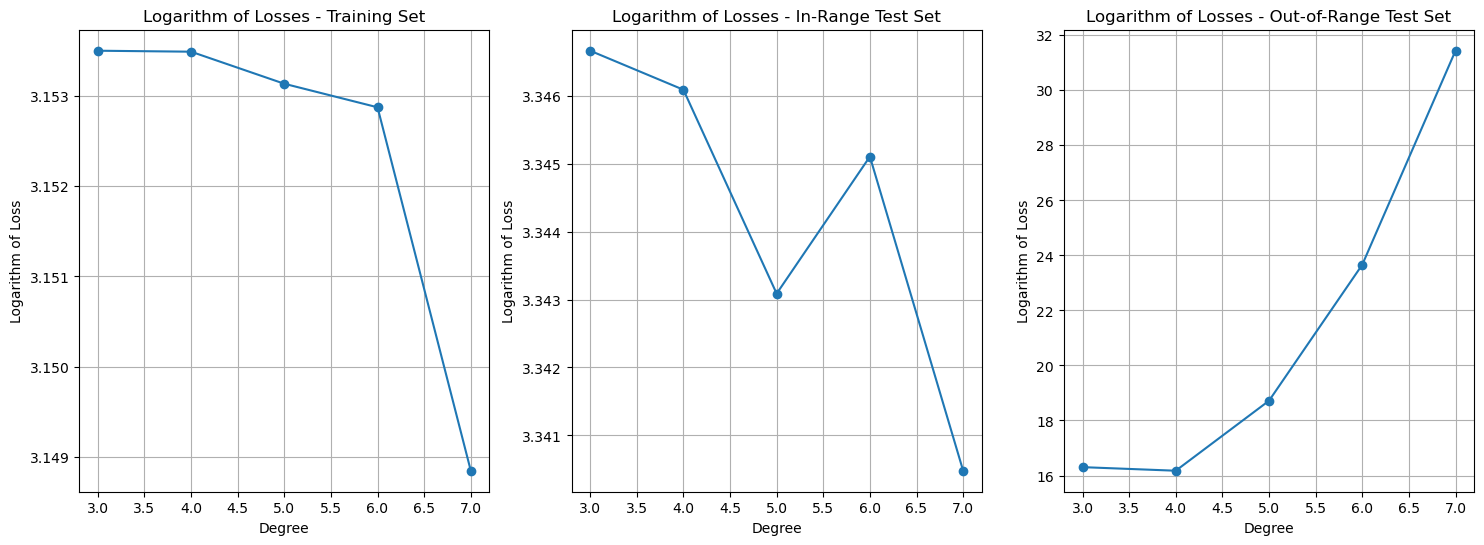

In [14]:
losses_train_avg = {degree: 0 for degree in range(3, 8)}
losses_in_range_avg = {degree: 0 for degree in range(3, 8)}
losses_out_of_range_avg = {degree: 0 for degree in range(3, 8)}

for degree in range(3, 8):
    losses_train_avg[degree] = np.log(losses_train[degree])
    losses_in_range_avg[degree] = np.log(losses_in_range[degree])
    losses_out_of_range_avg[degree] = np.log(losses_out_of_range[degree])

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

ax1.plot(range(3, 8), [losses_train_avg[degree] for degree in range(3, 8)], marker='o', linestyle='-')
ax1.set_title('Logarithm of Losses - Training Set')
ax1.set_xlabel('Degree')
ax1.set_ylabel('Logarithm of Loss')
ax1.grid(True)

ax2.plot(range(3, 8), [losses_in_range_avg[degree] for degree in range(3, 8)], marker='o', linestyle='-')
ax2.set_title('Logarithm of Losses - In-Range Test Set')
ax2.set_xlabel('Degree')
ax2.set_ylabel('Logarithm of Loss')
ax2.grid(True)

ax3.plot(range(3, 8), [losses_out_of_range_avg[degree] for degree in range(3, 8)], marker='o', linestyle='-')
ax3.set_title('Logarithm of Losses - Out-of-Range Test Set')
ax3.set_xlabel('Degree')
ax3.set_ylabel('Logarithm of Loss')
ax3.grid(True)

plt.show()


## Conclusion (10 Points)

Now print out the losses on each set here. 

In [15]:
# Losses on training set
print("Training Set Losses:", losses_train)

# Losses on in-range test set
print("In-range Test Set Losses:", losses_in_range)

# Losses on out-of-range test set
print("Out-of-range Test Set Losses:", losses_out_of_range)


Training Set Losses: {2: 31.78116788120575, 3: 23.41791126895679, 4: 23.41766002556358, 5: 23.409339831397148, 6: 23.40323099341624, 7: 23.309163223716833}
In-range Test Set Losses: {2: 37.736536570809946, 3: 28.407755876608427, 4: 28.39145078384948, 5: 28.306377503591296, 6: 28.363528563138015, 7: 28.2326904384095}
Out-of-range Test Set Losses: {2: 267945.76689368725, 3: 12040812.9606598, 4: 10572163.548736056, 5: 134539758.28963524, 6: 18887105957.500343, 7: 45154178514794.42}


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

When comparing the losses between the training set and the in-range test set, we notice that the losses on the in-range test set are slightly higher than those on the training set across all degrees. This indicates that the model is not generalizing perfectly to unseen data, suggesting a slight overfitting tendency. This discrepancy between the training and test losses highlights the variance component of the bias-variance trade-off. The higher losses on the in-range test set suggest that the model's predictions vary more when applied to unseen data, indicating higher variance.

On the other hand, when comparing the losses between the in-range test set and the out-of-range test set, especially in higher degrees, we observe a significant increase in losses on the out-of-range test set. This substantial increase suggests that the model is struggling to generalize well to completely unseen data points, which is a clear sign of overfitting. In higher degrees, the model becomes overly complex and starts fitting to noise, leading to poor performance on unseen data. This phenomenon indicates the bias component of the bias-variance trade-off. The high losses on the out-of-range test set suggest that the model is biased towards the training data and lacks the flexibility to capture the underlying patterns in unseen data.

In conclusion, these observations highlight the bias-variance trade-off in machine learning models. While the model exhibits some overfitting tendencies, it still maintains a reasonable balance between bias and variance, with slight overfitting observed on the in-range test set and more pronounced overfitting seen on the out-of-range test set, particularly in higher degrees. This emphasizes the importance of finding a model complexity that balances between fitting the training data well and generalizing to unseen data effectively, striking the right balance between bias and variance.
